## Import Libraries & Modules

In [4]:
# !pip install tensorflow

In [5]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import nltk
import re

## Load the Data

In [6]:
input_file = 'holmes.txt'

# read the content of the files
with open(input_file,'r',encoding='utf-8') as file:
  data = file.read()

In [7]:
data[:100]

"*Project Gutenberg's Etext of Tom Swift And His Submarine Boat*\n\n#4 in the Victor Appleton's Tom Swi"

In [8]:
# we use 6 lakh data
data = data[:500000]


## Data Cleaning

In [9]:
def remove_emojis_special_character(text):
      # remove special character
      text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

      # remove extra spaces
      text = re.sub(' +', ' ', text)
      return text

In [10]:
def preprocess_text(data):
  sentences = data.split('\n')

  for i in range(len(sentences)):
    sentences[i] = remove_emojis_special_character(sentences[i])

  sentences = [s.strip() for s in sentences]
  sentences = [s for s in sentences if len(s) > 0]

  tokenized = []
  for sentence in sentences:
    sentence = sentence.lower()
    tokenized.append(sentence)
  return tokenized

In [11]:
preprocess_text(data)

['project gutenbergs etext of tom swift and his submarine boat',
 '4 in the victor appletons tom swift series',
 'we name these etext files as they are numbered in the books',
 'ie this is 4 in the series so the file name is 04tomxxxxxx',
 'where the xs are place holders for editon and file type such',
 'as 04tom10txt and 04tom10zip when we do a htm 04tom10hhtm',
 'copyright laws are changing all over the world be sure to check',
 'the copyright laws for your country before posting these files',
 'please take a look at the important information in this header',
 'we encourage you to keep this file on your own disk keeping an',
 'electronic path open for the next readers do not remove this',
 'welcome to the world of free plain vanilla electronic texts',
 'etexts readable by both humans and by computers since 1971',
 'these etexts prepared by hundreds of volunteers and donations',
 'information on contacting project gutenberg to get etexts and',
 'further information is included below w

In [12]:
tokenized_sentences = preprocess_text(data)

In [13]:
tokenized_sentences

['project gutenbergs etext of tom swift and his submarine boat',
 '4 in the victor appletons tom swift series',
 'we name these etext files as they are numbered in the books',
 'ie this is 4 in the series so the file name is 04tomxxxxxx',
 'where the xs are place holders for editon and file type such',
 'as 04tom10txt and 04tom10zip when we do a htm 04tom10hhtm',
 'copyright laws are changing all over the world be sure to check',
 'the copyright laws for your country before posting these files',
 'please take a look at the important information in this header',
 'we encourage you to keep this file on your own disk keeping an',
 'electronic path open for the next readers do not remove this',
 'welcome to the world of free plain vanilla electronic texts',
 'etexts readable by both humans and by computers since 1971',
 'these etexts prepared by hundreds of volunteers and donations',
 'information on contacting project gutenberg to get etexts and',
 'further information is included below w

In [14]:
# tokenize words

tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(tokenized_sentences)
total_words = len(tokenizer.word_index)+1

input_sequences = []
for line in tokenized_sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    print(token_list)

    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

Streaming output truncated to the last 5000 lines.
[2, 998, 76, 2, 189, 4, 2, 175, 10, 2, 95]
[9, 7, 6, 107, 382, 17, 89, 143, 7, 227, 951]
[939, 9, 7, 119, 31, 2, 62, 20, 19, 200, 19, 25]
[67, 720, 66, 11, 109, 1420, 157, 126, 6, 186, 65, 2, 152]
[3, 73, 35, 266, 3387, 63, 101, 452, 22, 165, 29, 300]
[112, 143, 48, 129, 430, 24, 434, 51, 2561]
[369, 13, 74, 126, 6, 186, 12, 4, 530, 105, 86, 4, 16]
[64, 45, 22, 109, 80, 742, 17, 6, 168, 184, 25, 50]
[41, 134, 31, 2, 357]
[2, 85, 72, 246, 15, 86, 4, 2, 343]
[462, 10, 2, 511, 16, 37, 21, 931, 1632, 46]
[1475, 5, 2, 327, 4, 51, 295, 246, 14, 9, 21]
[28, 71, 2562, 6, 406, 1475, 535, 14, 42, 452]
[21, 71, 300, 38, 2, 2539, 531, 14, 21, 71, 10]
[2227, 1159, 5, 2, 133, 143, 2, 622, 21]
[121, 569, 10, 2, 4711, 4, 21, 566, 91, 2, 1211]
[4712, 3431, 1078, 4713, 20, 30, 7, 182]
[174, 17, 2, 907]
[485, 319, 118, 30, 7, 6, 526, 4714, 43, 440]
[640, 12, 19, 8, 2408, 62, 99, 10, 2, 634]
[621, 201, 103, 8, 7, 4715, 2, 152, 84, 19]
[182, 4, 3433, 102, 

In [15]:
# tokenizer.word_counts

In [16]:
total_words

6120

In [17]:
input_sequences

[[218, 1569],
 [218, 1569, 211],
 [218, 1569, 211, 5],
 [218, 1569, 211, 5, 12],
 [218, 1569, 211, 5, 12, 37],
 [218, 1569, 211, 5, 12, 37, 4],
 [218, 1569, 211, 5, 12, 37, 4, 15],
 [218, 1569, 211, 5, 12, 37, 4, 15, 55],
 [218, 1569, 211, 5, 12, 37, 4, 15, 55, 175],
 [2681, 10],
 [2681, 10, 2],
 [2681, 10, 2, 1249],
 [2681, 10, 2, 1249, 2682],
 [2681, 10, 2, 1249, 2682, 12],
 [2681, 10, 2, 1249, 2682, 12, 37],
 [2681, 10, 2, 1249, 2682, 12, 37, 711],
 [25, 437],
 [25, 437, 310],
 [25, 437, 310, 211],
 [25, 437, 310, 211, 712],
 [25, 437, 310, 211, 712, 19],
 [25, 437, 310, 211, 712, 19, 22],
 [25, 437, 310, 211, 712, 19, 22, 67],
 [25, 437, 310, 211, 712, 19, 22, 67, 2175],
 [25, 437, 310, 211, 712, 19, 22, 67, 2175, 10],
 [25, 437, 310, 211, 712, 19, 22, 67, 2175, 10, 2],
 [25, 437, 310, 211, 712, 19, 22, 67, 2175, 10, 2, 1009],
 [2683, 33],
 [2683, 33, 32],
 [2683, 33, 32, 2681],
 [2683, 33, 32, 2681, 10],
 [2683, 33, 32, 2681, 10, 2],
 [2683, 33, 32, 2681, 10, 2, 711],
 [2683, 33, 

In [18]:
max_sequence_len = max([len(x) for x in input_sequences])

In [19]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,padding='pre'))

In [20]:
input_sequences

array([[   0,    0,    0, ...,    0,  218, 1569],
       [   0,    0,    0, ...,  218, 1569,  211],
       [   0,    0,    0, ..., 1569,  211,    5],
       ...,
       [   0,    0,    0, ...,   12,   37,    4],
       [   0,    0,    0, ...,   37,    4,   15],
       [   0,    0,    0, ...,    4,   15, 6119]], dtype=int32)

In [21]:
X = input_sequences[:,:-1]

In [22]:
label = input_sequences[:,-1]

In [23]:
label

array([1569,  211,    5, ...,    4,   15, 6119], dtype=int32)

In [24]:
ys = tf.keras.utils.to_categorical(label, num_classes = total_words)

In [25]:
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [26]:
# Split data into training, validation, and test sets
from sklearn.model_selection import train_test_split
X_train_temp, X_val_test, y_train_temp, y_val_test = train_test_split(X, ys, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [27]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

# **Train LSTM Model**

In [28]:
model = Sequential()

model.add(Embedding(total_words,100))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
# train the model
history = model.fit(X_train_temp,y_train_temp,epochs=50,validation_data=(X_val,y_val),verbose=1)

Epoch 1/50
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.0758 - loss: 6.5205 - val_accuracy: 0.1128 - val_loss: 5.8184
Epoch 2/50
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.1256 - loss: 5.5189 - val_accuracy: 0.1394 - val_loss: 5.5588
Epoch 3/50
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.1513 - loss: 5.0419 - val_accuracy: 0.1491 - val_loss: 5.4972
Epoch 4/50
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.1742 - loss: 4.6767 - val_accuracy: 0.1556 - val_loss: 5.4897
Epoch 5/50
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.1958 - loss: 4.3654 - val_accuracy: 0.1609 - val_loss: 5.5319
Epoch 6/50
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.2224 - loss: 4.0532 - val_accuracy: 0.1620 - val_loss: 5.5997
Epoch 7/50
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.2510 - loss: 3.7707 - val_accuracy: 0.1672 - val_loss: 5.6738
Epoch 8/50
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.2867 - loss

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

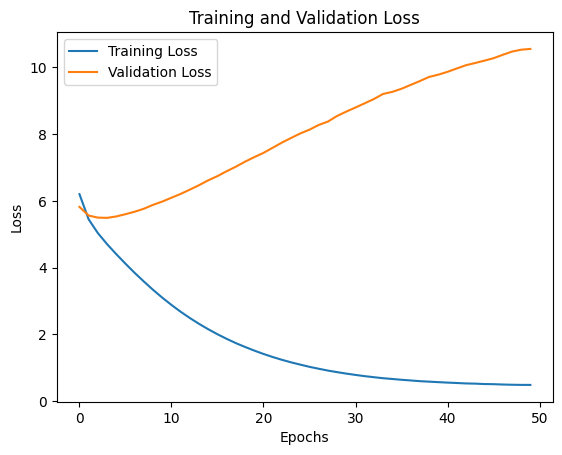

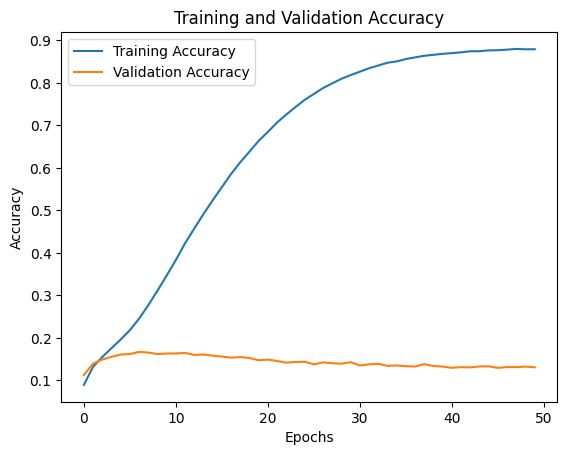

In [32]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
from IPython.display import HTML

def predict_top_five_words(model, tokenizer, seed_text):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    top_five_indexes = np.argsort(predicted[0])[::-1][:5]
    top_five_words = []
    for index in top_five_indexes:
        for word, idx in tokenizer.word_index.items():
            if idx == index:
                top_five_words.append(word)
                break
    return top_five_words

def predict_and_display_top_five_words(seed_text, model, tokenizer):
    top_five_words = predict_top_five_words(model, tokenizer, seed_text)
    heading_app = f"<h1>Sentence AutoCompletion App With Five Outputs</h1>"
    output_text = f"<ul>{''.join([f'<li>{seed_text} {word}</li>' for word in top_five_words])}</ul>"
    javascript_code = f"""
    <script>
        var newWindow = window.open("", "_blank");
        newWindow.document.write('<html><head><title>Top Five Words</title></head><body>{heading_app} <br> <hr> {output_text}</body></html>');
    </script>
    """
    return HTML(javascript_code)

In [35]:
# Test the function
seed_text = "She is my"
predict_and_display_top_five_words(seed_text,model, tokenizer)

In [37]:


# Test 2:
# Test the function
seed_text = "I have"
predict_and_display_top_five_words(seed_text, model, tokenizer)



In [38]:
# Test 3:
# Test the function
seed_text = "I love"
predict_and_display_top_five_words(seed_text, model, tokenizer)

In [39]:
# Test 2:
# Test the function
seed_text = "the weather is"
predict_and_display_top_five_words(seed_text, model, tokenizer)

In [40]:
# Test 2:
# Test the function
seed_text = "how are"
predict_and_display_top_five_words(seed_text, model, tokenizer)

In [41]:
# Test 2:
# Test the function
seed_text = "please subscribe my"
predict_and_display_top_five_words(seed_text, model, tokenizer)